In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train,y_train),(X_test,y_test)= fashion_mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
image0 = X_train[0]

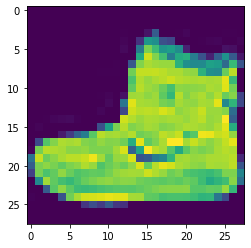

In [8]:
plt.imshow(image0)

In [9]:
y_train.shape

(60000,)

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
y_train.shape

(60000, 10)

In [13]:
X_train.max()

255

In [14]:
X_train=X_train/255
X_test=X_test/255

In [15]:
X_train=X_train.reshape(60000, 28, 28,1)
X_test=X_test.reshape(10000, 28, 28,1)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPool2D,Flatten

In [76]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [77]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [78]:
from tensorflow.keras.callbacks import EarlyStopping

In [80]:
early_stop=EarlyStopping(monitor='val_loss',patience=10)

In [81]:
model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4126 - accuracy: 0.8526 - val_loss: 0.3291 - val_accuracy: 0.8836
Epoch 2/30
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2813 - accuracy: 0.8978 - val_loss: 0.3058 - val_accuracy: 0.8893
Epoch 3/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2374 - accuracy: 0.9125 - val_loss: 0.2708 - val_accuracy: 0.8998
Epoch 4/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.2033 - accuracy: 0.9249 - val_loss: 0.2542 - val_accuracy: 0.9067
Epoch 5/30
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1762 - accuracy: 0.9350 - val_loss: 0.2484 - val_accuracy: 0.9099
Epoch 6/30
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1521 - accuracy: 0.9431 - val_loss: 0.2876 - val_accuracy: 0.9000
Epoch 7/30
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1310 - accuracy: 0.9517 - val_loss: 0.2689 - v

In [82]:
metrics=pd.DataFrame(model.history.history)

In [83]:
model.metrics_names

['loss', 'accuracy']

In [84]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

In [85]:
model.evaluate(X_test,y_test,verbose=0)

[0.40818652510643005, 0.9083999991416931]

<AxesSubplot:>

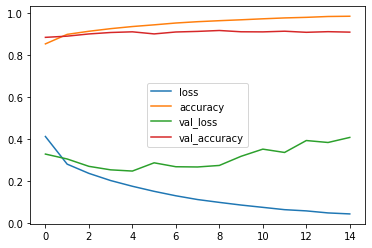

In [86]:
metrics.plot()

In [87]:
from sklearn.metrics import classification_report

In [88]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [89]:
predictions.shape

(10000, 10)

In [90]:
predictions.shape

(10000, 10)

In [91]:
y_pred=np.argmax(predictions, axis=1)
y_test=np.argmax(y_test, axis=1)

In [92]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.88      0.85      1000
           3       0.94      0.88      0.91      1000
           4       0.85      0.87      0.86      1000
           5       0.98      0.99      0.98      1000
           6       0.76      0.75      0.75      1000
           7       0.97      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

